In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras import Model
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D,Input
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate

In [2]:
X = np.load("/kaggle/input/60x60-npy-dataset/pixel_value_array.npy")
Y = np.load("/kaggle/input/60x60-npy-dataset/label.npy")

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=8)
del X
del Y

In [5]:
input_ = Input(shape = (60, 60, 3))
path_1 = Conv2D(8, (1,1), padding='same', activation='relu')(input_)
path_1 = Conv2D(8, (3,3), padding='same', activation='relu')(path_1)
path_2 = Conv2D(16, (1,1), padding='same', activation='relu')(input_)
path_2 = Conv2D(16, (5,5), padding='same', activation='relu')(path_2)
path_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_)
path_3 = Conv2D(16, (1,1), padding='same', activation='relu')(path_3)
output = keras.layers.concatenate([path_1, path_2, path_3], axis = 3)
output = Flatten()(output)
out = Dense(2, activation='softmax')(output)
model = Model(inputs = input_, outputs = out)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 60, 60, 8)    32          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 16)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 60, 60, 3)    0           input_1[0][0]                    
______________________________________________________________________________________________

2022-04-18 09:36:21.872283: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.save("inception_model.h5",save_format='h5')

In [7]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True, mode='min')

In [8]:
batch_size=150
epochs=50
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, Y_test), verbose = 2, callbacks=[early_stopping])

2022-04-18 09:36:22.596789: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
57/57 - 21s - loss: 0.5741 - accuracy: 0.7136 - val_loss: 0.5275 - val_accuracy: 0.7495
Epoch 2/50
57/57 - 20s - loss: 0.4774 - accuracy: 0.7850 - val_loss: 0.4668 - val_accuracy: 0.7976
Epoch 3/50
57/57 - 20s - loss: 0.4462 - accuracy: 0.8037 - val_loss: 0.4419 - val_accuracy: 0.7882
Epoch 4/50
57/57 - 20s - loss: 0.3857 - accuracy: 0.8364 - val_loss: 0.4297 - val_accuracy: 0.7969
Epoch 5/50
57/57 - 20s - loss: 0.3562 - accuracy: 0.8495 - val_loss: 0.4270 - val_accuracy: 0.7776
Epoch 6/50
57/57 - 20s - loss: 0.3260 - accuracy: 0.8657 - val_loss: 0.3915 - val_accuracy: 0.8270
Epoch 7/50
57/57 - 20s - loss: 0.2969 - accuracy: 0.8797 - val_loss: 0.4314 - val_accuracy: 0.7702
Epoch 8/50
57/57 - 20s - loss: 0.2806 - accuracy: 0.8861 - val_loss: 0.3904 - val_accuracy: 0.8424
Epoch 9/50
57/57 - 20s - loss: 0.2698 - accuracy: 0.8893 - val_loss: 0.4074 - val_accuracy: 0.8009
Epoch 10/50
57/57 - 20s - loss: 0.2463 - accuracy: 0.9032 - val_loss: 0.3912 - val_accuracy: 0.8170
Epoch 11/

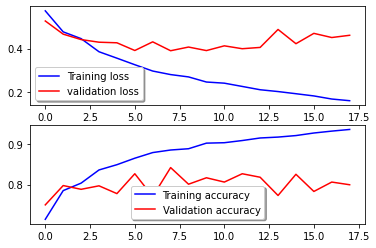

In [12]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [13]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
print(confusion_matrix(Y_true, Y_pred_classes))

[[1236  264]
 [ 133  862]]


In [14]:
score = metrics.precision_score(Y_true,Y_pred_classes, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, Y_pred_classes, average= "weighted")
print("Recall score: {}".format(score))
score_f1 = metrics.f1_score(Y_true, Y_pred_classes, average= "weighted")
print("F1 score: {}".format(score_f1))

Precision score: 0.8480910717765975
Recall score: 0.8408817635270541
F1 score: 0.8421628889157267


- bari inception network mad edini,google net self implement madi tune madoke tumba kasta aytu
https://github.com/KhuyenLE-maths/Implementation-of-GoogLeNet-on-Keras/blob/main/Implementation_of_GoogLeNet_on_Keras.ipynb
- eli full ede, implement madoke try madi